In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Set display options to show all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings("ignore")
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.feature_selection import mutual_info_classif as MIC
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

In [47]:
filePath = "Dataset/Bondora_preprocessed.csv"
features = pd.read_csv(filePath)
target = features['Default']
features.drop(['Default'], axis=1, inplace = True)

In [48]:
delete_cols =["BidsPortfolioManager","BidsApi","BidsManual","Age","LastPaymentOn"]
features.drop(columns = delete_cols , inplace=True)
features.sample(5)

,NewCreditCustomer,VerificationType,LanguageCode,Gender,Country,AppliedAmount,Amount,Interest,LoanDuration,MonthlyPayment,County,City,UseOfLoan,Education,MaritalStatus,EmploymentStatus,EmploymentDurationCurrentEmployer,OccupationArea,HomeOwnershipType,IncomeTotal,ExistingLiabilities,LiabilitiesTotal,RefinanceLiabilities,DebtToIncome,FreeCash,MonthlyPaymentDay,Rating,Restructured,CreditScoreEsMicroL,PrincipalPaymentsMade,InterestAndPenaltyPaymentsMade,PrincipalBalance,InterestAndPenaltyBalance,NoOfPreviousLoansBeforeLoan,AmountOfPreviousLoansBeforeLoan,PreviousRepaymentsBeforeLoan,PreviousEarlyRepaymentsCountBeforeLoan,AgeGroup
17055,1,Income and expenses verified,Estonian,Male,EE,160.0,160.0,22.00,24,NaN,TARTU,TARTU,Other,Entrepreneur,Single,Fully employed,UpTo1Year,Other,Living with parents,1000.0,0,0.00,0,0.00,0.00,1,NaN,0,NaN,90.28,25.06,69.72,580.29,3,3000.0,272.09,0,Young Adults
11326,1,Income and expenses verified,Estonian,Woman,FI,10630.0,4130.0,34.57,60,460.68,UUSIMAA,VANTAA,Other,Partially employed,Cohabitant,Fully employed,MoreThan5Years,Other,Owner with encumbrance,1800.0,6,1347.00,0,70.43,-7.68,15,F,0,NaN,4130.00,271.75,0.00,0.00,0,0.0,0.00,0,Young Adults
73402,0,Income unverified,Estonian,Woman,EE,2764.0,2764.0,28.60,60,91.08,Harju maakond,Tallinn,NaN,Self-employed,Not_specified,NaN,UpTo1Year,NaN,"Tenant, pre-furnished property",1500.0,4,495.45,0,0.00,0.00,18,D,0,M,46.95,74.74,2717.05,115.55,5,11255.0,1150.58,1,Young Adults
9629,1,Income verified,Finnish,Male,FI,3190.0,3190.0,41.19,60,133.06,POHJOIS-POHJANMAA,OULUNSALO,Other,Entrepreneur,Cohabitant,Fully employed,UpTo4Years,Construction,Mortgage,2115.0,2,1034.00,0,6.29,947.94,1,HR,1,NaN,1006.24,4372.54,2183.76,75.23,0,0.0,0.00,0,Middle Aged
23336,0,Income and expenses verified,Finnish,Male,FI,530.0,530.0,8.30,36,18.46,NaN,OULU,NaN,Entrepreneur,Not_specified,NaN,MoreThan5Years,NaN,Mortgage,2750.0,9,2203.65,0,0.00,0.00,1,AA,0,M,206.70,58.52,323.30,31.63,3,11390.0,7336.76,0,Middle Aged


converting categorical data into numerical data

In [49]:
features["VerificationType"] = features["VerificationType"].astype("category").cat.codes
features["LanguageCode"] = features["LanguageCode"].astype("category").cat.codes
features["Gender"] = features["Gender"].astype("category").cat.codes
features["Country"] = features["Country"].astype("category").cat.codes
features["County"] = features["County"].astype("category").cat.codes
features["City"] = features["City"].astype("category").cat.codes
features["UseOfLoan"] = features["UseOfLoan"].astype("category").cat.codes
features["Education"] = features["Education"].astype("category").cat.codes
features["MaritalStatus"] = features["MaritalStatus"].astype("category").cat.codes
features["EmploymentStatus"] = features["EmploymentStatus"].astype("category").cat.codes
features["OccupationArea"] = features["OccupationArea"].astype("category").cat.codes
features["HomeOwnershipType"] = features["HomeOwnershipType"].astype("category").cat.codes
features["AgeGroup"] = features["AgeGroup"].astype("category").cat.codes
features["EmploymentDurationCurrentEmployer"] = features["EmploymentDurationCurrentEmployer"].astype("category").cat.codes
features["Rating"] = features["Rating"].astype("category").cat.codes
features["CreditScoreEsMicroL"] = features["CreditScoreEsMicroL"].astype("category").cat.codes

Filling null values with mean values

In [50]:
features_new = features.fillna(features.mean())
print(features_new.shape)
features_new.sample(5)

(77394, 38)


,NewCreditCustomer,VerificationType,LanguageCode,Gender,Country,AppliedAmount,Amount,Interest,LoanDuration,MonthlyPayment,County,City,UseOfLoan,Education,MaritalStatus,EmploymentStatus,EmploymentDurationCurrentEmployer,OccupationArea,HomeOwnershipType,IncomeTotal,ExistingLiabilities,LiabilitiesTotal,RefinanceLiabilities,DebtToIncome,FreeCash,MonthlyPaymentDay,Rating,Restructured,CreditScoreEsMicroL,PrincipalPaymentsMade,InterestAndPenaltyPaymentsMade,PrincipalBalance,InterestAndPenaltyBalance,NoOfPreviousLoansBeforeLoan,AmountOfPreviousLoansBeforeLoan,PreviousRepaymentsBeforeLoan,PreviousEarlyRepaymentsCountBeforeLoan,AgeGroup
63144,1,1,1,0,0,700.0,700.0,34.00,18,130.393314,817,4801,14,3,4,1,4,17,7,650.0,1,250.00,0,7.69,351.0,10,6,0,-1,700.00,222.20,0.00,0.00,0,0.0,0.00,0,3
55972,1,0,5,0,3,3000.0,3000.0,26.00,24,0.000000,787,2434,9,3,4,1,7,12,4,540.0,2,110.00,0,30.00,268.0,10,7,0,-1,399.09,279.92,2600.91,13188.15,0,0.0,0.00,0,3
5172,1,3,2,0,2,3500.0,3500.0,30.34,6,647.700000,858,1602,8,1,4,1,6,14,9,1760.0,5,1023.00,0,64.93,89.3,15,5,1,-1,3500.00,448.38,0.00,0.00,0,0.0,0.00,0,3
51455,1,1,2,0,2,8825.0,8825.0,42.13,60,383.960000,646,3928,-1,0,3,-1,4,-1,9,2100.0,4,539.92,0,0.00,0.0,3,6,1,0,138.93,1213.01,8686.07,2764.96,1,2125.0,150.61,0,0
58220,0,0,2,0,2,4250.0,4250.0,42.13,48,198.570000,624,5499,-1,1,3,-1,4,-1,9,2200.0,6,740.85,0,0.00,0.0,17,6,1,0,148.70,1120.68,4101.30,294.32,2,5205.0,502.96,0,3


Finding outlyers and replacing with mean value

In [51]:
for column in features_new.columns:
    mean = features_new[column].mean()
    std = features_new[column].std()
    threshold = 3 * std
    features_new[column] = np.where(abs(features_new[column] - mean) > threshold, mean, features_new[column])


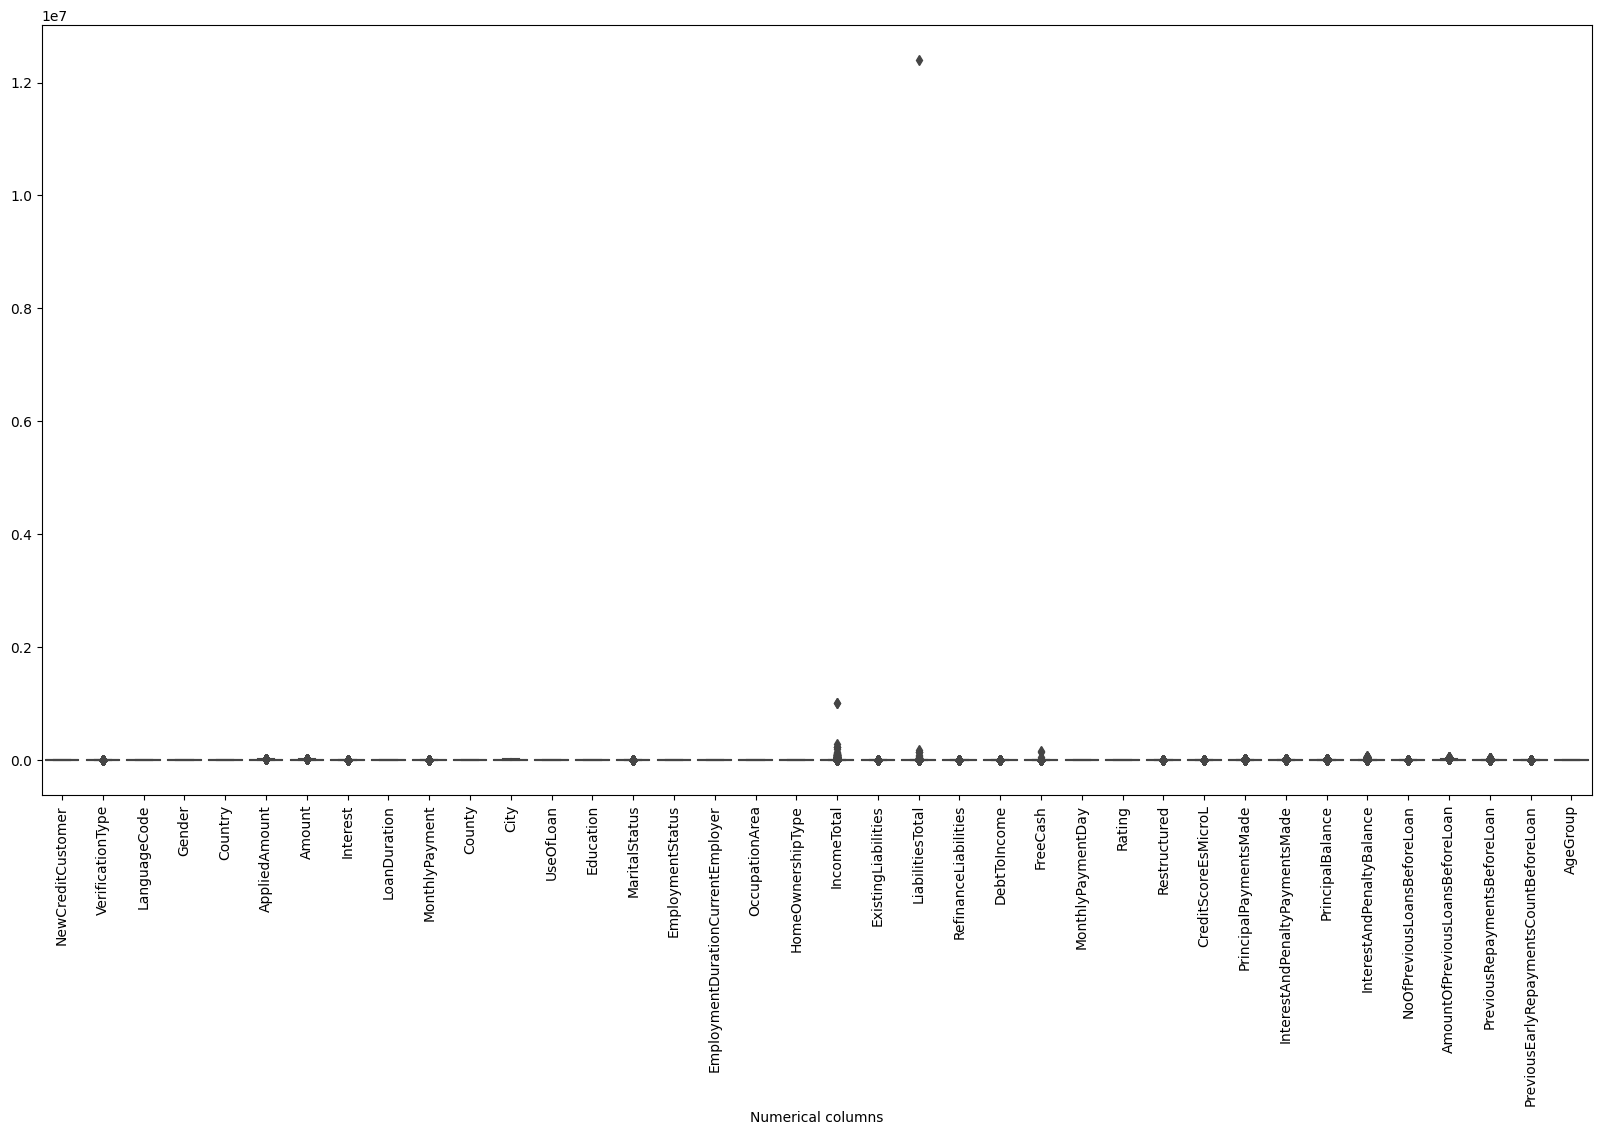

In [52]:
plt.figure(figsize=(20, 10))
sns.boxplot(data=features)
plt.xlabel("Numerical columns")
plt.xticks(rotation=90)
plt.show()

In [53]:
# Mutual Information Score
mi_score = MIC(features_new,target)
miSeries = pd.Series(mi_score, name='Mutual Information Score')
miSeries.index = features_new.columns
miSeries.sort_values(ascending=False, inplace=True)
print(miSeries)

InterestAndPenaltyBalance                 0.344185
PrincipalPaymentsMade                     0.280739
PrincipalBalance                          0.248886
InterestAndPenaltyPaymentsMade            0.069673
Interest                                  0.061012
City                                      0.052770
MonthlyPayment                            0.051710
Amount                                    0.044253
AppliedAmount                             0.041497
Rating                                    0.034431
County                                    0.029980
LanguageCode                              0.026235
IncomeTotal                               0.025201
Country                                   0.022621
LoanDuration                              0.020327
Restructured                              0.019284
PreviousRepaymentsBeforeLoan              0.016732
CreditScoreEsMicroL                       0.016596
MonthlyPaymentDay                         0.010945
LiabilitiesTotal               

Text(0.5, 0, 'MI score')

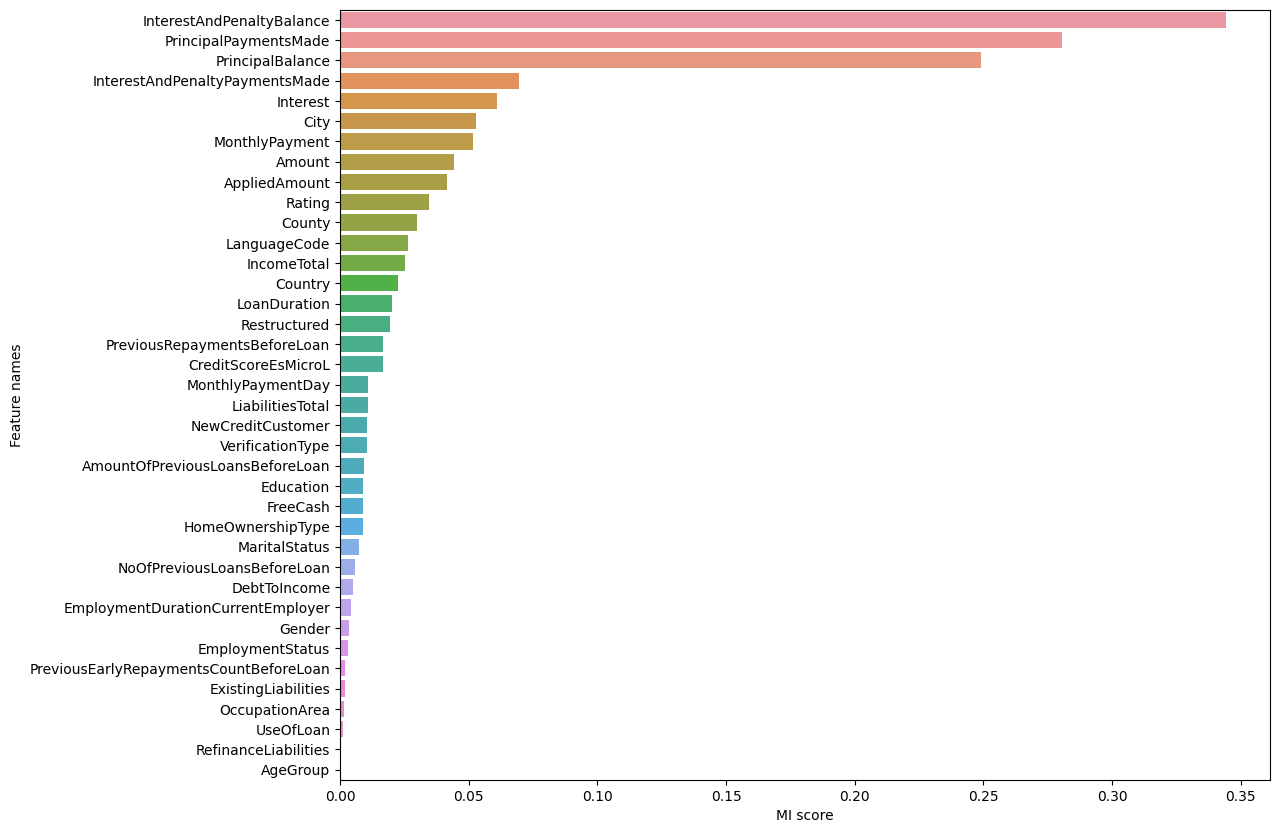

In [54]:
plt.figure(figsize=(12,10))
sns.barplot(y=miSeries.index, x=miSeries.values)
plt.ylabel("Feature names")
plt.xlabel("MI score")

In [55]:
print(miSeries[miSeries>0.01].index)
better_columns =miSeries[miSeries>0.01].index
model_features = features_new[better_columns]
print(model_features.shape)
model_features.sample(5)

Index(['InterestAndPenaltyBalance', 'PrincipalPaymentsMade',
       'PrincipalBalance', 'InterestAndPenaltyPaymentsMade', 'Interest',
       'City', 'MonthlyPayment', 'Amount', 'AppliedAmount', 'Rating', 'County',
       'LanguageCode', 'IncomeTotal', 'Country', 'LoanDuration',
       'Restructured', 'PreviousRepaymentsBeforeLoan', 'CreditScoreEsMicroL',
       'MonthlyPaymentDay', 'LiabilitiesTotal', 'NewCreditCustomer',
       'VerificationType'],
      dtype='object')
(77394, 22)


,InterestAndPenaltyBalance,PrincipalPaymentsMade,PrincipalBalance,InterestAndPenaltyPaymentsMade,Interest,City,MonthlyPayment,Amount,AppliedAmount,Rating,County,LanguageCode,IncomeTotal,Country,LoanDuration,Restructured,PreviousRepaymentsBeforeLoan,CreditScoreEsMicroL,MonthlyPaymentDay,LiabilitiesTotal,NewCreditCustomer,VerificationType
45916,831.22,880.02,5709.98,930.310000,22.48,5734.0,205.77,6590.0,6590.0,4.0,250.0,1.0,876.0,0.0,60.0,1.0,54.460000,0.000000,15.0,227.23,0.0,1.0
68786,0.00,500.00,0.00,26.930000,31.00,1406.0,22.96,500.0,500.0,7.0,117.0,6.0,1100.0,1.0,36.0,0.0,0.000000,0.217084,1.0,660.00,1.0,3.0
62286,0.00,2445.00,0.00,71.420000,30.93,4444.0,88.66,2445.0,2445.0,5.0,703.0,1.0,2400.0,0.0,60.0,0.0,861.138387,0.000000,13.0,0.00,1.0,1.0
11561,2637.13,1268.94,5106.06,502.770026,28.71,6008.0,215.04,6375.0,6375.0,4.0,-1.0,2.0,3400.0,2.0,60.0,1.0,0.000000,-1.000000,14.0,2312.00,1.0,0.0
72433,2299.54,1734.60,1665.40,863.670000,31.00,3752.0,201.78,3400.0,3400.0,7.0,624.0,2.0,1700.0,2.0,24.0,0.0,0.000000,-1.000000,17.0,1300.00,1.0,3.0


In [56]:
# Initialize the MinMaxScaler
scaler = MinMaxScaler()
# Normalize the dataset
features_norm = scaler.fit_transform(model_features)
features_norm = pd.DataFrame(features_norm, columns=model_features.columns)
print(features_norm.shape)
features_norm.sample(3)

(77394, 22)


,InterestAndPenaltyBalance,PrincipalPaymentsMade,PrincipalBalance,InterestAndPenaltyPaymentsMade,Interest,City,MonthlyPayment,Amount,AppliedAmount,Rating,County,LanguageCode,IncomeTotal,Country,LoanDuration,Restructured,PreviousRepaymentsBeforeLoan,CreditScoreEsMicroL,MonthlyPaymentDay,LiabilitiesTotal,NewCreditCustomer,VerificationType
7751,0.091684,0.045114,0.128240,0.000000,0.169016,0.670943,0.072094,0.129401,0.112539,0.625,0.733333,0.285714,0.112613,0.000000,1.00000,0.0,0.253529,0.000000,0.892857,0.020125,0.0,0.50
69902,0.028821,0.003955,0.295142,0.065065,0.433540,0.840302,0.242567,0.236621,0.207890,0.875,0.000000,1.000000,0.039170,0.333333,0.79661,0.0,0.137601,0.166667,0.464286,0.000000,1.0,0.25
44064,0.003478,0.010683,0.069098,0.063456,0.209760,0.488151,0.037338,0.058480,0.049468,0.750,0.261458,0.285714,0.048962,0.000000,1.00000,0.0,0.007128,0.166667,0.607143,0.002059,0.0,0.50


In [57]:
# Perform PCA
pca = PCA()
feature_pca = pca.fit_transform(features_norm)
feature_pca = pd.DataFrame(feature_pca, columns=[f"PC{i+1}" for i in range(feature_pca.shape[1])])
feature_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,0.277038,0.321500,-0.801478,-0.392555,-0.513273,0.315976,0.021978,-0.555896,-0.036174,0.109262
1,0.883763,-0.388121,-0.445333,-0.322852,-0.377877,0.651772,0.222359,-0.191673,-0.237841,0.154393
2,0.535007,0.892360,-0.150329,-0.821253,-0.051707,0.367891,-0.083461,-0.357391,-0.081277,0.024245
3,0.163405,0.197717,-0.753819,-0.443281,-0.438278,0.347816,0.086229,-0.253454,-0.201458,0.235140
4,0.426804,0.561869,-0.908759,-0.283043,-0.020563,0.418175,0.078404,-0.449222,-0.012842,-0.021184


[0.22321113 0.12932048 0.12531111 0.08954192 0.06476822 0.05142982
 0.04750461 0.04653284 0.04088451 0.03861829]


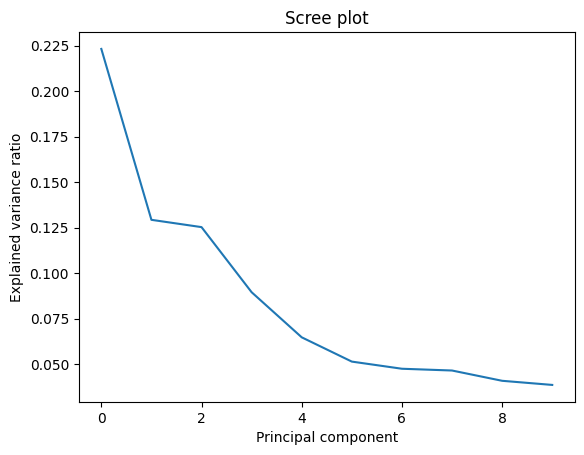

In [58]:
print(pca.explained_variance_ratio_)
# Create a scree plot of the eigenvalues
plt.plot(pca.explained_variance_ratio_)
plt.xlabel("Principal component")
plt.ylabel("Explained variance ratio")
plt.title("Scree plot")
plt.show()


In [59]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

In [60]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(feature_pca, target, test_size=0.25)

Accuracy score: 0.7988009716264406
Confusion matrix:
[[6471 2100]
 [1793 8985]]


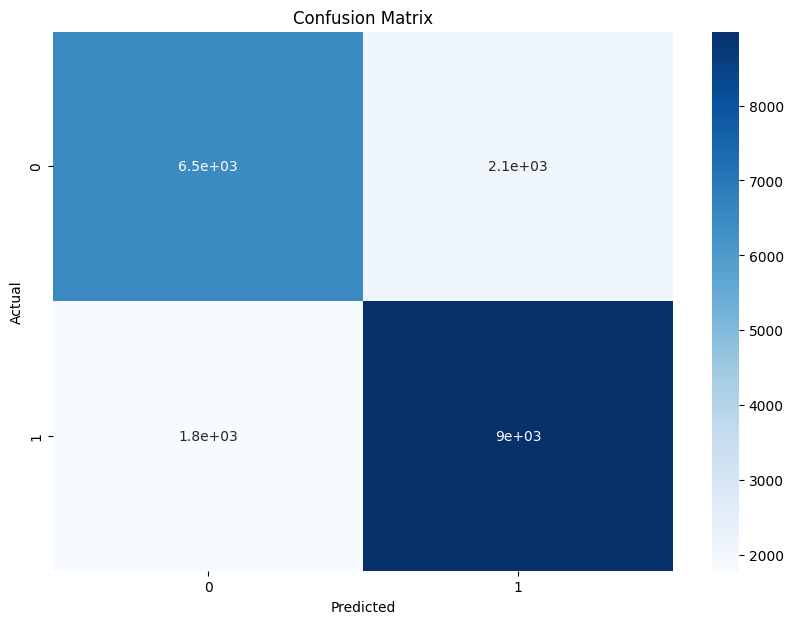

Classification report:
              precision    recall  f1-score   support

           0       0.78      0.75      0.77      8571
           1       0.81      0.83      0.82     10778

    accuracy                           0.80     19349
   macro avg       0.80      0.79      0.80     19349
weighted avg       0.80      0.80      0.80     19349



In [61]:
#random forest classifier
rfc_clf = RandomForestClassifier()
rfc_clf.fit(X_train, y_train)
y_pred_rfc = rfc_clf.predict(X_test)


print('Accuracy score:',accuracy_score(y_test, y_pred_rfc))
print('Confusion matrix:')
print(confusion_matrix(y_test, y_pred_rfc))
# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix(y_test, y_pred_rfc), annot=True, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()



print('Classification report:')
print(classification_report(y_test, y_pred_rfc))

Accuracy score: 0.7349217013799163
Confusion matrix:
[[5801 2770]
 [2359 8419]]


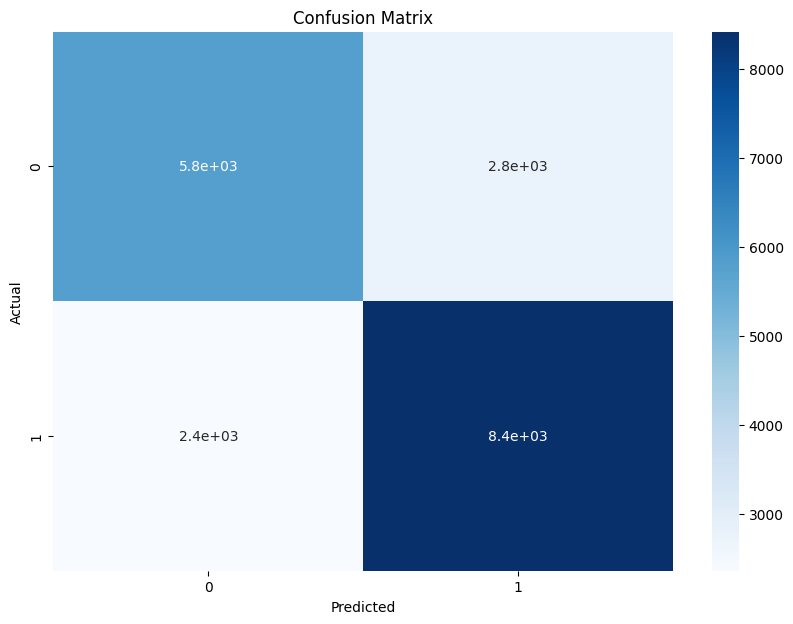

Classification report:
              precision    recall  f1-score   support

           0       0.71      0.68      0.69      8571
           1       0.75      0.78      0.77     10778

    accuracy                           0.73     19349
   macro avg       0.73      0.73      0.73     19349
weighted avg       0.73      0.73      0.73     19349



In [62]:
# Create the logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)

print('Accuracy score:', accuracy_score(y_test, y_pred_logreg))
print('Confusion matrix:')
print(confusion_matrix(y_test, y_pred_logreg))
# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix(y_test, y_pred_logreg), annot=True, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print('Classification report:')
print(classification_report(y_test, y_pred_logreg))


In [63]:
results = pd.DataFrame(columns =['accuracy_score', 'F1 score'], index = ["Random Forest Classifier" ])

In [64]:
results.loc['Random Forest Classifier'] = [accuracy_score(y_test, y_pred_rfc), round(f1_score(y_test, y_pred_rfc), 2)]
results.loc['Logistic regression'] = [accuracy_score(y_test, y_pred_logreg), round(f1_score(y_test, y_pred_logreg), 2)]

In [65]:
results

,accuracy_score,F1 score
Random Forest Classifier,0.798801,0.82
Logistic regression,0.734922,0.77
